In [1]:
# If you don't have the moduel please install them for this notebook
#!pip install Bio

In [2]:
import re
import numpy as np
import pandas as pd
from collections import Counter
import itertools
from Bio.SeqUtils.ProtParam import ProteinAnalysis

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read in data
data_solution = pd.read_csv('testing_data_solution.csv')
data_test = pd.read_csv('testing_data.csv')

In [4]:
data_test.head()

,Entry,Sequence,Selected_PDB
0,Q9LF79,MTSLLKSSPGRRRGGDVESGKSEHADSDSDTFYIPSKNASIERLQQ...,4aqr
1,P9WI81,MTTPSHLSDRYELGEILGFGGMSEVHLARDLRLHRDVAVKVLRADL...,3ork
2,P04439,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,4nqx
3,Q16581,MASFSAETNSTDLLSQPWNEPPVILSMVILSLTFLLGLPGNGLVLW...,8ia8
4,Q6QNK2,MEKLLRLCCWYSWLLLFYYNFQVRGVYSRSQDHPGFQVLASASHYW...,7wu2


In [5]:
data_solution.head()

,Entry,Sequence,Selected_PDB,ProteinClass
0,Q9LF79,MTSLLKSSPGRRRGGDVESGKSEHADSDSDTFYIPSKNASIERLQQ...,4aqr,ATPase
1,P9WI81,MTTPSHLSDRYELGEILGFGGMSEVHLARDLRLHRDVAVKVLRADL...,3ork,Ser:Thr
2,P04439,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,4nqx,MHC
3,Q16581,MASFSAETNSTDLLSQPWNEPPVILSMVILSLTFLLGLPGNGLVLW...,8ia8,GPCR
4,Q6QNK2,MEKLLRLCCWYSWLLLFYYNFQVRGVYSRSQDHPGFQVLASASHYW...,7wu2,GPCR


In [6]:
# encoder
labels = np.array(['ATPase', 'Aquaporin', 'Channel', 'GPCR', 'Integrin', 'MHC',
       'Phosphatase', 'Protease', 'RTK', 'Ser:Thr'])
Y_encoder = LabelEncoder().fit(labels)

In [7]:
Y_encoder.classes_

array(['ATPase', 'Aquaporin', 'Channel', 'GPCR', 'Integrin', 'MHC',
       'Phosphatase', 'Protease', 'RTK', 'Ser:Thr'], dtype='<U11')

In [8]:
# fake model
class random_model():
    def fit(X, y):
        pass
    def predict(X):
        pred = []
        for x in X:
            pred.append(np.random.randint(10))
        return pred

# Run Model

In [9]:
model = random_model
# Fit Model
model.fit(data_test.Sequence,1)
# Predict 
y_pred = model.predict(data_test.Sequence)

In [10]:
# transform back to labels
y_pred = Y_encoder.inverse_transform(y_pred)
y_test = data_solution.ProteinClass.values

# Evaluating model

Accuracy for testing data: 0.0936
Classification Report:
              precision    recall  f1-score   support

      ATPase       0.16      0.14      0.15        22
   Aquaporin       0.00      0.00      0.00         3
     Channel       0.21      0.09      0.13        32
        GPCR       0.29      0.15      0.19        41
    Integrin       0.00      0.00      0.00         4
         MHC       0.00      0.00      0.00        10
 Phosphatase       0.07      0.07      0.07        15
    Protease       0.06      0.08      0.07        13
         RTK       0.07      0.07      0.07        14
     Ser:Thr       0.06      0.06      0.06        17

    accuracy                           0.09       171
   macro avg       0.09      0.07      0.07       171
weighted avg       0.15      0.09      0.11       171



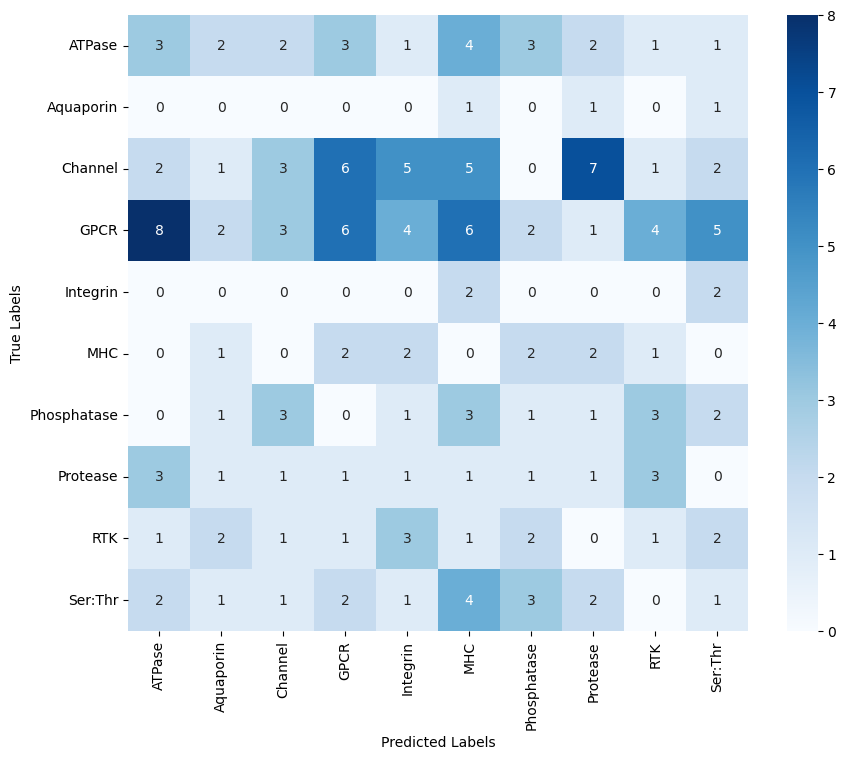

In [11]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for testing data: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
classes = Y_encoder.classes_
conf_matrix = confusion_matrix(y_test, y_pred, labels=classes)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Submission format

In [12]:
def save_predictions(_fn, _y_pred, _df):
    import csv
    with open(_fn, 'w') as fout:
        writer = csv.writer(fout, delimiter=',', lineterminator='\n')
        writer.writerow(['Entry', 'ProteinClass'])
        for y, Entry in zip(_df['Entry'], _y_pred):
            writer.writerow([y, Entry])

In [13]:
save_predictions('JHUID_prediction.csv', y_pred, data_test)

In [14]:
import pickle

In [15]:
# Save the model to a file using pickle
filename = 'random_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(random_model, file)